### This is the version of 4 regression models on Imputed_Data_Accepted imputed data with different feature selection methods

In [1]:
from mrmr import mrmr_classif
from sklearn.datasets import make_classification

In [2]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [3]:
import skfeature

In [4]:
# IMPORT MODULES

import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
# from sklearn.utils.fixes import signature
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from mlxtend.plotting import plot_learning_curves
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
data = pd.read_excel('../datafest/Imputed_Data_Accepted.xlsx')
print("With id", data.shape)
data_full = data
print("No id",data_full.shape)

With id (474, 21)
No id (474, 21)


In [7]:
df_los = data_full.dropna(subset=['LOS'])
df_los

,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,Infection Precaution,...,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS Outlier,Discharge Disposition,Age,LOS,ICU LOS
0,Accepted,Mercy Bakersfield,Arcadia,True,False,"Surgery, Colorectal",Telemetry,Orthopaedic Surgery,ER,Mrsa,...,Yes,Bloodless,Female,Craniotomy,Medicaid Managed Care,Outlier,Hospice,78.0,9.830506,3.002536
1,Accepted,Presbyterian Intercommunity (Pih),Whittier,True,False,Neurology-Stroke,Med/Surg,Medical Management/Optimization,ER,Covid Positive,...,Yes,Private Room,Male,Lymphoma,Medicare Managed Care,Outlier,Acute-Another Hosp,56.0,6.000000,3.000000
2,Accepted,Bakersfield Memorial,Citrus Valley,False,False,"Surgery, Otorhino",Telemetry,Surgical Evaluation/Surgery,Home,R/O Covid (Pui),...,Yes,Private Room,Female,Other General Medicine,Medicaid Managed Care,Outlier,Home Health Org,60.0,10.033178,3.455110
3,Accepted,Norris Cancer Hospital,Downey,False,False,"Surgery, Trauma",ICU,Surgical Evaluation/Surgery,Acute Rehab,Mrsa,...,Yes,Private Room,Female,Infectious Disease,Managed Exchange,Outlier,Expired,53.0,2.000000,2.000000
4,Accepted,Hollywood Presbyterian,Citrus Valley,False,False,Nephrology,Telemetry,Orthopaedic Surgery,ER,Covid Positive,...,Yes,Bloodless,Female,Lower Joint Revision,Medicaid Managed Care,Outlier,Intermediate Care,42.0,10.235850,3.907683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Accepted,Valley Presbyterian,Downey,True,False,Internal Medicin- Hospitalist,Telemetry,Surgical Evaluation/Surgery,ER,Covid Positive,...,Yes,Private Room,Female,Other Gi Medicine,Medicaid Managed Care,Outlier,Home/Self Care,63.0,6.000000,0.000000
470,Accepted,Verdugo Hills,Arcadia,False,False,Cardiology,Stepdown,Surgical Evaluation/Surgery,Home,Immuno Compromised,...,Yes,Private Room,Female,Percutaneous Cardiac Procedures,Medicare,Outlier,Home/Self Care,75.0,2.000000,0.000000
471,Accepted,County Lac Usc,Citrus Valley,True,False,"Surgery, Orthope",Med/Surg,Surgical Evaluation/Surgery,Home,Immuno Compromised,...,Yes,Private Room,Female,Fracture/Injury,Medicare,Outlier,Home Health Org,46.0,5.000000,0.000000
472,Accepted,Garfield,Citrus Valley,False,False,"Surgery, Neurolo- Spine",Med/Surg,Orthopaedic Surgery,Home,Immuno Compromised,...,Yes,Bloodless,Male,Hand Surgery,Medicaid,Outlier,Rehab,49.0,10.157033,3.731682


In [8]:
data_full.info()
data_full.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Request Status                                     474 non-null    object 
 1   Transfer Referral Source                           474 non-null    object 
 2   County                                             474 non-null    object 
 3   Transfer Back Agreement                            474 non-null    bool   
 4   LOA (Mark X if Yes)                                474 non-null    bool   
 5   Accepting Physician Specialty                      474 non-null    object 
 6   Required Level Of Care                             474 non-null    object 
 7   Requested Treatment Intervention                   474 non-null    object 
 8   From Where Patient Admitted to Referring Facility  474 non-null    object 
 9   Infection 

,Age,LOS,ICU LOS
count,474.000000,474.000000,474.000000
mean,58.513800,10.049912,3.492477
std,17.105175,11.595429,8.714988
min,18.000000,1.000000,0.000000
25%,46.250000,4.000000,0.000000
50%,60.000000,9.706651,2.000000
75%,71.000000,10.224590,3.693968
max,90.000000,132.000000,132.000000


tensorflow not supported for python 3.8

In [9]:
data_full.head(5)

,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,Infection Precaution,...,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS Outlier,Discharge Disposition,Age,LOS,ICU LOS
0,Accepted,Mercy Bakersfield,Arcadia,True,False,"Surgery, Colorectal",Telemetry,Orthopaedic Surgery,ER,Mrsa,...,Yes,Bloodless,Female,Craniotomy,Medicaid Managed Care,Outlier,Hospice,78.0,9.830506,3.002536
1,Accepted,Presbyterian Intercommunity (Pih),Whittier,True,False,Neurology-Stroke,Med/Surg,Medical Management/Optimization,ER,Covid Positive,...,Yes,Private Room,Male,Lymphoma,Medicare Managed Care,Outlier,Acute-Another Hosp,56.0,6.000000,3.000000
2,Accepted,Bakersfield Memorial,Citrus Valley,False,False,"Surgery, Otorhino",Telemetry,Surgical Evaluation/Surgery,Home,R/O Covid (Pui),...,Yes,Private Room,Female,Other General Medicine,Medicaid Managed Care,Outlier,Home Health Org,60.0,10.033178,3.455110
3,Accepted,Norris Cancer Hospital,Downey,False,False,"Surgery, Trauma",ICU,Surgical Evaluation/Surgery,Acute Rehab,Mrsa,...,Yes,Private Room,Female,Infectious Disease,Managed Exchange,Outlier,Expired,53.0,2.000000,2.000000
4,Accepted,Hollywood Presbyterian,Citrus Valley,False,False,Nephrology,Telemetry,Orthopaedic Surgery,ER,Covid Positive,...,Yes,Bloodless,Female,Lower Joint Revision,Medicaid Managed Care,Outlier,Intermediate Care,42.0,10.235850,3.907683


In [10]:
# Label = LOS
y = df_los['LOS']
X = df_los.drop('LOS', 1)

print("y - Labels", y.shape)
print("X - No Label No id ", X.shape)
print(X.columns)

y - Labels (474,)
X - No Label No id  (474, 20)
Index(['Request Status', 'Transfer Referral Source', 'County',
       'Transfer Back Agreement', 'LOA (Mark X if Yes)',
       'Accepting Physician Specialty', 'Required Level Of Care',
       'Requested Treatment Intervention',
       'From Where Patient Admitted to Referring Facility',
       'Infection Precaution', 'Patient Status',
       'EMTALA Y/N(Patient Status Details)', 'Special Considerations',
       'Gender', 'DRG Program', 'Payor', 'LOS Outlier',
       'Discharge Disposition', 'Age', 'ICU LOS'],
      dtype='object')


In [11]:
y

0       9.830506
1       6.000000
2      10.033178
3       2.000000
4      10.235850
         ...    
469     6.000000
470     2.000000
471     5.000000
472    10.157033
473    22.000000
Name: LOS, Length: 474, dtype: float64

In [12]:
X

,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,Infection Precaution,Patient Status,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS Outlier,Discharge Disposition,Age,ICU LOS
0,Accepted,Mercy Bakersfield,Arcadia,True,False,"Surgery, Colorectal",Telemetry,Orthopaedic Surgery,ER,Mrsa,Inpatient,Yes,Bloodless,Female,Craniotomy,Medicaid Managed Care,Outlier,Hospice,78.0,3.002536
1,Accepted,Presbyterian Intercommunity (Pih),Whittier,True,False,Neurology-Stroke,Med/Surg,Medical Management/Optimization,ER,Covid Positive,Inpatient,Yes,Private Room,Male,Lymphoma,Medicare Managed Care,Outlier,Acute-Another Hosp,56.0,3.000000
2,Accepted,Bakersfield Memorial,Citrus Valley,False,False,"Surgery, Otorhino",Telemetry,Surgical Evaluation/Surgery,Home,R/O Covid (Pui),ER,Yes,Private Room,Female,Other General Medicine,Medicaid Managed Care,Outlier,Home Health Org,60.0,3.455110
3,Accepted,Norris Cancer Hospital,Downey,False,False,"Surgery, Trauma",ICU,Surgical Evaluation/Surgery,Acute Rehab,Mrsa,Inpatient,Yes,Private Room,Female,Infectious Disease,Managed Exchange,Outlier,Expired,53.0,2.000000
4,Accepted,Hollywood Presbyterian,Citrus Valley,False,False,Nephrology,Telemetry,Orthopaedic Surgery,ER,Covid Positive,Inpatient,Yes,Bloodless,Female,Lower Joint Revision,Medicaid Managed Care,Outlier,Intermediate Care,42.0,3.907683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Accepted,Valley Presbyterian,Downey,True,False,Internal Medicin- Hospitalist,Telemetry,Surgical Evaluation/Surgery,ER,Covid Positive,Inpatient,Yes,Private Room,Female,Other Gi Medicine,Medicaid Managed Care,Outlier,Home/Self Care,63.0,0.000000
470,Accepted,Verdugo Hills,Arcadia,False,False,Cardiology,Stepdown,Surgical Evaluation/Surgery,Home,Immuno Compromised,ER,Yes,Private Room,Female,Percutaneous Cardiac Procedures,Medicare,Outlier,Home/Self Care,75.0,0.000000
471,Accepted,County Lac Usc,Citrus Valley,True,False,"Surgery, Orthope",Med/Surg,Surgical Evaluation/Surgery,Home,Immuno Compromised,Inpatient,Yes,Private Room,Female,Fracture/Injury,Medicare,Outlier,Home Health Org,46.0,0.000000
472,Accepted,Garfield,Citrus Valley,False,False,"Surgery, Neurolo- Spine",Med/Surg,Orthopaedic Surgery,Home,Immuno Compromised,Inpatient,Yes,Bloodless,Male,Hand Surgery,Medicaid,Outlier,Rehab,49.0,3.731682


## mutual_info_regression

In [14]:
X = pd.get_dummies(X)

In [18]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X, y)

In [19]:
mi_dict = dict(zip(X.columns, mi_scores))

# Sort the features based on their mutual information scores in descending order
sorted_mi = sorted(mi_dict.items(), key=lambda x: x[1], reverse=True)


In [20]:
len(sorted_mi)

191

In [21]:
sorted_mi

[('ICU LOS', 1.575975447517815),
 ('Age', 0.41525832168245813),
 ('Special Considerations_Private Room', 0.16555915507596564),
 ('Special Considerations_Bloodless', 0.152427437564993),
 ('DRG Program_-', 0.0819814228694904),
 ('Discharge Disposition_Acute-Another Hosp', 0.06405961792380421),
 ('Accepting Physician Specialty_Surgery, Cardiova', 0.06307502245190832),
 ('Accepting Physician Specialty_Gastroenterology', 0.06268723805911591),
 ('Discharge Disposition_Home/Self Care', 0.061817542112273305),
 ('Discharge Disposition_Home Health Org', 0.05850390160730479),
 ('Patient Status_Inpatient', 0.058156605477864165),
 ('DRG Program_Chemotherapy', 0.057097012846215156),
 ('DRG Program_Heart Transplant', 0.05314915706731216),
 ('DRG Program_Digestive Cancer', 0.05306403046568309),
 ('Accepting Physician Specialty_Rheumatology', 0.05187702570600217),
 ('Gender_Other', 0.04775519222322755),
 ('Transfer Referral Source_Methodist Hospital', 0.04449690772116521),
 ('Infection Precaution_Mrsa'

In [22]:
result = [t for t in sorted_mi if t[1] > 0.005]
len(result)

103

In [23]:
# Select the top k features with highest mutual information score
k = 102
selected_features = [f[0] for f in sorted_mi[:k]]

# Use the selected features to train a machine learning model
X_selected = X[selected_features]

In [24]:
X_selected

,ICU LOS,Age,Special Considerations_Private Room,Special Considerations_Bloodless,DRG Program_-,Discharge Disposition_Acute-Another Hosp,"Accepting Physician Specialty_Surgery, Cardiova",Accepting Physician Specialty_Gastroenterology,Discharge Disposition_Home/Self Care,Discharge Disposition_Home Health Org,...,County_ Whittier,Transfer Referral Source_Gardena Memorial,Transfer Referral Source_Garfield,Accepting Physician Specialty_Neurology,Requested Treatment Intervention_Thoracic Surgery,DRG Program_Amputation,From Where Patient Admitted to Referring Facility_Acute Hospital,DRG Program_Kidney Cancer,DRG Program_Kidney,DRG Program_Esophageal & Motility
0,3.002536,78.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.000000,56.0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3.455110,60.0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.000000,53.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.907683,42.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0.000000,63.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
470,0.000000,75.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
471,0.000000,46.0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
472,3.731682,49.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## SelectKBest

In [13]:
# from sklearn.feature_selection import SelectKBest
# # perform feature selection using mutual information
# k = 5  # number of features to select
# selector = SelectKBest(score_func=mutual_info_regression, k=k)
# X_new = selector.fit_transform(X, y)

# # print the selected features
# selected_features = [i for i, mask in enumerate(selector.get_support()) if mask]
# print('Selected features:', selected_features)

## one_hot_encoding

In [25]:
#                     
categorical_columns = [
                    'Request Status',
                    'Transfer Referral Source',
                    'County',
                    'Transfer Back Agreement', 
                    'LOA (Mark X if Yes)',
                    'Accepting Physician Specialty', 
                    'Required Level Of Care',
                    'Requested Treatment Intervention',
                    'From Where Patient Admitted to Referring Facility',
                    'Infection Precaution', 
                    'Patient Status',
                    'EMTALA Y/N(Patient Status Details)', 
                    'Special Considerations',
                    'Gender', 
                    'DRG Program', 
                    'Payor', 
                    'LOS Outlier',
                    'Discharge Disposition',
                    
                      ]
for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    if col in X.columns:
        one_hot_encoded = pd.get_dummies(X[col])
        X = X.drop(col, axis=1)
        X = X.join(one_hot_encoded, lsuffix='_left', rsuffix='_right')
        
print(X.shape)

(474, 193)


Both X and y in the mrmr_classif function should be numeric arrays or data frames, where X represents the features and y represents the target variable or class labels. The algorithm is designed to work with numeric data, such as continuous or discrete values.

## mrmr classification

In [26]:
from mrmr import mrmr_classif
# use mrmr classification
selected_features2 = mrmr_classif(X, y, K = 102)

100%|█████████████████████████████████████████| 102/102 [00:01<00:00, 78.07it/s]


In [27]:
selected_features2

['ICU LOS',
 'Discharge Disposition_Hospice',
 'DRG Program_Back/Neck Procedures',
 'DRG Program_Lymphoma',
 'DRG Program_Cranial Surgery',
 'Accepting Physician Specialty_Hematology',
 'Infection Precaution_App-90',
 'Accepting Physician Specialty_Surgery, Transplant- Hepato',
 'Accepting Physician Specialty_Ob/Gyn',
 'DRG Program_Craniotomy',
 'DRG Program_Other Gi Surgery',
 'Transfer Referral Source_Hollywood Presbyterian',
 'Accepting Physician Specialty_Surgery, General- Bariatric',
 'DRG Program_Heart Transplant',
 'Transfer Referral Source_Huntington Park Community',
 'DRG Program_-',
 'Discharge Disposition_Long Term Care',
 'DRG Program_Nutrition/Metabolic',
 'DRG Program_Liver Transplant',
 'DRG Program_Head & Neck Cancer',
 'DRG Program_Ecmo',
 'DRG Program_Acute Leukemia',
 'DRG Program_Amputation',
 'DRG Program_Tracheostomy',
 'DRG Program_Heart Failure',
 'DRG Program_Intracranial Stroke',
 'Accepting Physician Specialty_Surgery, Plastic',
 'Infection Precaution_C. Auri

## mrmr

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    data_full[col] = le.fit_transform(data_full[col])
X1 = data_full.drop('LOS', axis=1).values
y1 = data_full['LOS'].values


In [29]:
X1

array([[ 0.        , 17.        ,  1.        , ...,  4.        ,
        78.        ,  3.0025365 ],
       [ 0.        , 22.        ,  4.        , ...,  0.        ,
        56.        ,  3.        ],
       [ 0.        ,  2.        ,  2.        , ...,  2.        ,
        60.        ,  3.45510987],
       ...,
       [ 0.        ,  6.        ,  2.        , ...,  2.        ,
        46.        ,  0.        ],
       [ 0.        ,  8.        ,  2.        , ...,  8.        ,
        49.        ,  3.73168248],
       [ 0.        ,  8.        ,  2.        , ...,  9.        ,
        86.        ,  2.        ]])

In [30]:
X1.shape

(474, 20)

In [105]:
# selected_features = mrmr_classif(X1, y1, K = 10)

In [106]:
# idxs = mrmr.mrmr(X1, y1, n_selected_features=5)

## backward selection

#### Group the lower portion of categories to one bigger categories

In [11]:
total = df_los['DRG Program'].count()
value_counts = df_los['DRG Program'].value_counts(normalize=True)
df_counts = pd.DataFrame({'value': value_counts.index, 'count': value_counts.values})
df_counts['portion'] = df_counts['count'].apply(lambda x: x/total)
df_counts = df_counts.sort_values(by='portion', ascending=False)
df_counts

,value,count,portion
0,Other General Medicine,0.044304,0.000093
1,Other Gi Medicine,0.040084,0.000085
2,Hepatobiliary Surgery,0.037975,0.000080
3,-,0.035865,0.000076
4,Hepatobiliary Disorders,0.035865,0.000076
...,...,...,...
63,Valve Disorder,0.002110,0.000004
64,Back/Neck Procedures,0.002110,0.000004
65,Chemotherapy,0.002110,0.000004
66,Transurethral,0.002110,0.000004


In [33]:

XnotNorm = X_selected.copy()
print('XnotNorm ', XnotNorm.shape)
ynotNorm = y.copy()
print('ynotNorm ', ynotNorm.shape)

XnotNorm  (474, 102)
ynotNorm  (474,)


In [34]:

XnotNorm = XnotNorm.drop('ICU LOS',1)
XnotNorm.columns

Index(['Age', 'Special Considerations_Private Room',
       'Special Considerations_Bloodless', 'DRG Program_-',
       'Discharge Disposition_Acute-Another Hosp',
       'Accepting Physician Specialty_Surgery, Cardiova',
       'Accepting Physician Specialty_Gastroenterology',
       'Discharge Disposition_Home/Self Care',
       'Discharge Disposition_Home Health Org', 'Patient Status_Inpatient',
       ...
       'County_ Whittier', 'Transfer Referral Source_Gardena Memorial',
       'Transfer Referral Source_Garfield',
       'Accepting Physician Specialty_Neurology',
       'Requested Treatment Intervention_Thoracic Surgery',
       'DRG Program_Amputation',
       'From Where Patient Admitted to Referring Facility_Acute Hospital',
       'DRG Program_Kidney Cancer', 'DRG Program_Kidney',
       'DRG Program_Esophageal & Motility'],
      dtype='object', length=101)

In [35]:
ynotNorm

0       9.830506
1       6.000000
2      10.033178
3       2.000000
4      10.235850
         ...    
469     6.000000
470     2.000000
471     5.000000
472    10.157033
473    22.000000
Name: LOS, Length: 474, dtype: float64

##### Clean data

In [36]:
XnotNorm.replace('Unknown', pd.np.nan, inplace=True)
XnotNorm.replace('89+', 90, inplace=True)

Normalize X

In [37]:
x = XnotNorm.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
XNorm = pd.DataFrame(x_scaled, columns=XnotNorm.columns)
#print(XNorm)
#print(y)
print('X normalized')

X normalized


In [38]:
XNorm.columns = XNorm.columns.astype(str) 
XNorm

,Age,Special Considerations_Private Room,Special Considerations_Bloodless,DRG Program_-,Discharge Disposition_Acute-Another Hosp,"Accepting Physician Specialty_Surgery, Cardiova",Accepting Physician Specialty_Gastroenterology,Discharge Disposition_Home/Self Care,Discharge Disposition_Home Health Org,Patient Status_Inpatient,...,County_ Whittier,Transfer Referral Source_Gardena Memorial,Transfer Referral Source_Garfield,Accepting Physician Specialty_Neurology,Requested Treatment Intervention_Thoracic Surgery,DRG Program_Amputation,From Where Patient Admitted to Referring Facility_Acute Hospital,DRG Program_Kidney Cancer,DRG Program_Kidney,DRG Program_Esophageal & Motility
0,1.140403,-0.876731,0.876731,-0.192871,-0.220619,-0.331768,-0.131024,-0.884282,-0.507242,0.562731,...,-0.225827,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,-0.4022,-0.122431,-0.180775,-0.113228
1,-0.147117,1.140601,-1.140601,-0.192871,4.532709,-0.331768,-0.131024,-0.884282,-0.507242,0.562731,...,4.428171,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,-0.4022,-0.122431,-0.180775,-0.113228
2,0.086978,1.140601,-1.140601,-0.192871,-0.220619,-0.331768,-0.131024,-0.884282,1.971446,-1.777047,...,-0.225827,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,-0.4022,-0.122431,-0.180775,-0.113228
3,-0.322687,1.140601,-1.140601,-0.192871,-0.220619,-0.331768,-0.131024,-0.884282,-0.507242,0.562731,...,-0.225827,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,-0.4022,-0.122431,-0.180775,-0.113228
4,-0.966447,-0.876731,0.876731,-0.192871,-0.220619,-0.331768,-0.131024,-0.884282,-0.507242,0.562731,...,-0.225827,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,-0.4022,-0.122431,-0.180775,-0.113228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0.262549,1.140601,-1.140601,-0.192871,-0.220619,-0.331768,-0.131024,1.130861,-0.507242,0.562731,...,-0.225827,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,-0.4022,-0.122431,-0.180775,-0.113228
470,0.964832,1.140601,-1.140601,-0.192871,-0.220619,-0.331768,-0.131024,1.130861,-0.507242,-1.777047,...,-0.225827,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,-0.4022,-0.122431,-0.180775,-0.113228
471,-0.732353,1.140601,-1.140601,-0.192871,-0.220619,-0.331768,-0.131024,-0.884282,1.971446,0.562731,...,-0.225827,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,-0.4022,-0.122431,-0.180775,-0.113228
472,-0.556782,-0.876731,0.876731,-0.192871,-0.220619,-0.331768,-0.131024,-0.884282,-0.507242,0.562731,...,-0.225827,-0.04598,5.954959,-0.092253,-0.04598,-0.065094,-0.4022,-0.122431,-0.180775,-0.113228


In [40]:
# SPLIT into Train & Test

X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.2, random_state=7)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (379, 101)
X_test:  (95, 101)
y_train:  (379,)
y_test:  (95,)


In [41]:

# Test Models and evaluation metric
seed = 42
scoring = 'accuracy' 

# Spot Check Algorithms
Mymodels = []
Mymodels.append(('LinearReg', LinearRegression()))
Mymodels.append(('Ridge', Ridge(alpha=0.5)))
Mymodels.append(('RandomForestRegressor', RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)))
Mymodels.append(('Lasso', Lasso(alpha=0.1)))

# Evaluate each model in turn
results = []
names = []
# ,error_score='raise'
for name, model in Mymodels:
    # Train the model on the training data
    model.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print("%s mse: %f "% (name, mse))
    
    
    
#     kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
#     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg) 

LinearReg mse: 342307569801205817278464.000000 
Ridge mse: 185.773654 
RandomForestRegressor mse: 153.410558 
Lasso mse: 168.663633 


# Linear Regressor

In [48]:
# Optimize hyper params for one model

Linearmodel = LinearRegression()

param_grid = [{},]

Linearmodel = GridSearchCV(Linearmodel, param_grid, cv=5, scoring=scoring)
Linearmodel.fit(XNorm, y)

print(Linearmodel.best_estimator_)

LinearRegression()


In [51]:
Linearmodel = LinearRegression()

In [52]:
res_norm = Linearmodel.fit(XNorm, y)
final_predictions = Linearmodel.predict(X_test)
# Generate the R-squared
r2 = r2_score(y_test, final_predictions)
print('R-squared:', r2)
mse = mean_squared_error(y_test, final_predictions)
print("Mean Squared Error:", mse)

R-squared: 0.4148843562856265
Mean Squared Error: 110.05608567251042


In [71]:
import statsmodels.api as sm
# Add an intercept term to the input data
X = sm.add_constant(XNorm)

# Fit a linear regression model using statsmodels
stats_model = sm.OLS(y, X).fit()

# Get the p-values for each coefficient
p_values = stats_model.pvalues[1:]
significant_p_values = p_values[p_values < 0.05].sort_values()
significant_p_values

DRG Program_Ecmo                            1.783308e-18
Discharge Disposition_Home/Self Care        4.190248e-04
DRG Program_Heart Transplant                2.232469e-03
Age                                         1.724872e-02
DRG Program_Surgical Valve Procedures       3.311571e-02
Discharge Disposition_Acute-Another Hosp    3.339046e-02
Discharge Disposition_Home Health Org       3.449322e-02
Payor_Medicare Managed Care                 4.335890e-02
Discharge Disposition_Hospice               4.566121e-02
Accepting Physician Specialty_Hematology    4.700737e-02
dtype: float64

In [77]:
conf_int = stats_model.conf_int(alpha=0.05) 
conf_int

,0,1
const,9.158307,10.941517
Age,-2.529051,-0.247011
Special Considerations_Private Room,-0.697235,0.700826
Special Considerations_Bloodless,-0.700826,0.697235
DRG Program_-,-1.990823,0.160883
...,...,...
DRG Program_Amputation,-1.474271,0.525719
From Where Patient Admitted to Referring Facility_Acute Hospital,-1.236140,0.907593
DRG Program_Kidney Cancer,-1.140702,0.835095
DRG Program_Kidney,-1.306888,0.810249


In [75]:
significant_p_values.index

Index(['DRG Program_Ecmo', 'Discharge Disposition_Home/Self Care',
       'DRG Program_Heart Transplant', 'Age',
       'DRG Program_Surgical Valve Procedures',
       'Discharge Disposition_Acute-Another Hosp',
       'Discharge Disposition_Home Health Org', 'Payor_Medicare Managed Care',
       'Discharge Disposition_Hospice',
       'Accepting Physician Specialty_Hematology'],
      dtype='object')

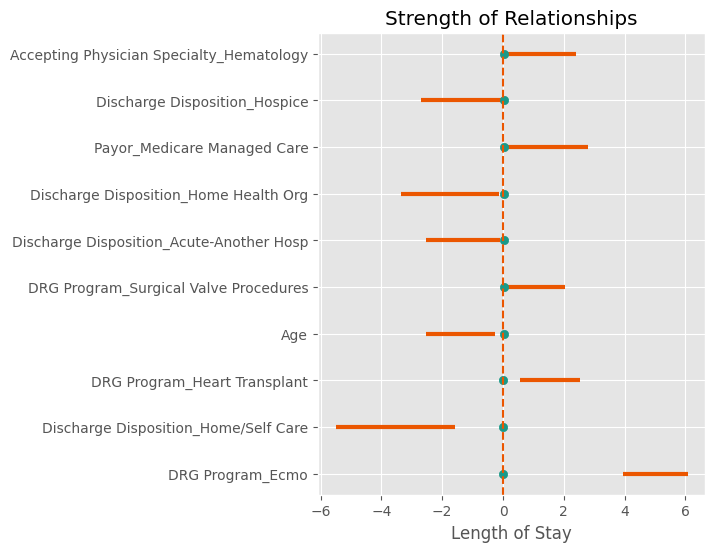

In [78]:
fig, ax = plt.subplots(figsize=(5,6), dpi=100)
ax.scatter(significant_p_values, range(len(significant_p_values)), color="#1a9988", zorder=2)
ax.set_yticks(range(len(significant_p_values)), significant_p_values.index) # label the y axis with the ind. variable names
ax.set_xlabel("Length of Stay")
ax.set_title("Strength of Relationships")

# add the confidence interval error bars
for idx, ci in enumerate(conf_int.loc[significant_p_values.index].iterrows()):
    ax.hlines(idx, ci[1][0], ci[1][1], color="#eb5600", zorder=1, linewidth=3)

plt.axline((0,0), (0,1), color="#eb5600", linestyle="--") # add a dashed line at 0.0


In [47]:
final_predictions

array([ 8.23030097, 13.74592597,  9.95686347, 11.30842597,  8.04280097,
       10.48811347,  2.79280097, 12.37092597,  7.71467597,  8.99592597,
       12.40217597,  9.69514472,  8.29670722,  8.01155097, 17.65217597,
        6.98030097, 32.41780097,  7.33186347,  9.92561347,  4.70686347,
        2.98811347, 12.27717597, 17.85530097,  7.82405097,  8.06623847,
       13.21467597, 21.75373847,  8.85530097,  8.81623847,  0.87483222,
        6.98030097,  5.33186347,  7.60530097, 16.79280097,  7.61311347,
        2.02717597,  5.98030097,  5.41780097,  6.47248847, 10.76936347,
        7.77717597, 51.32405097,  5.25373847, 14.79280097,  3.88655097,
        4.44905097,  8.41780097,  9.46467597,  7.94905097, 10.63655097,
        7.30842597,  7.34748847,  6.53498847, 13.64436347,  9.69905097,
        8.58967597, 16.13655097,  1.85920722,  7.76936347, 12.25373847,
        5.94905097,  4.75373847, 16.34748847,  7.11311347,  6.47248847,
       12.94905097,  7.07405097,  8.95686347,  6.85530097,  3.76

# Random Forest Regressor

In [80]:
# Optimize hyper params for one model

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

param_grid = [{},]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring)
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=5, random_state=42)


In [81]:
model = RandomForestRegressor(max_depth=5, random_state=42)

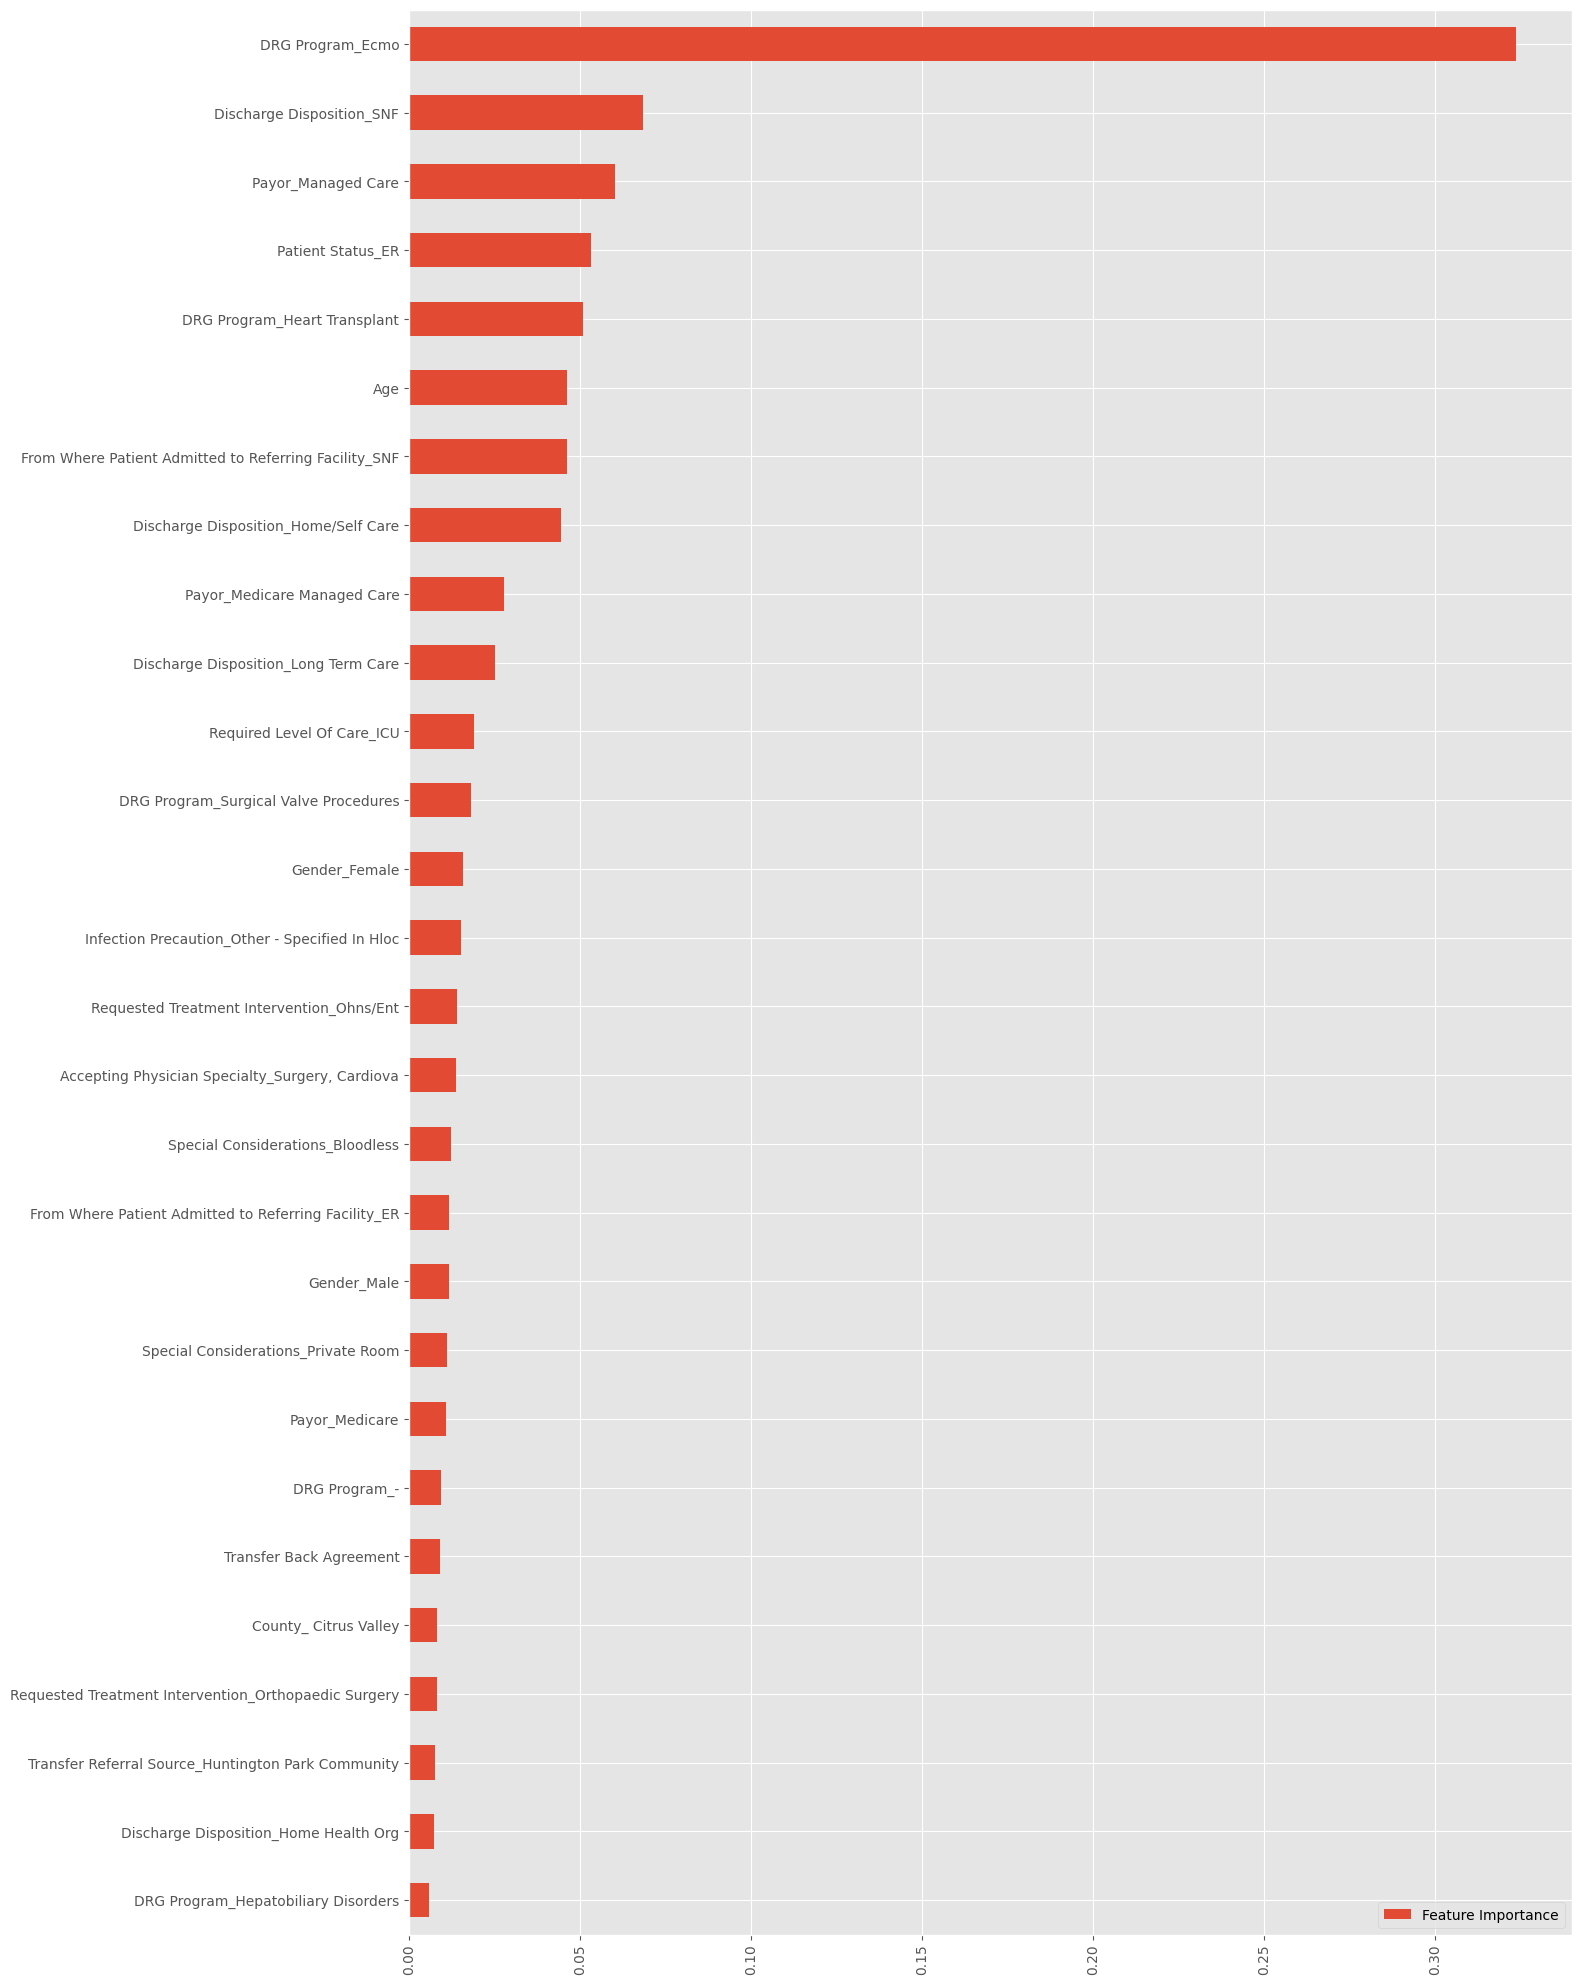

In [99]:
# FEATURE IMPORTANCE - NORMALIZED - last model

trainFinalFI = XNorm
yFinalFI = y

model.fit(trainFinalFI,yFinalFI)

FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model[FI_model["Feature Importance"] > 0.005].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

In [100]:
# List of important features for model
FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model=FI_model.sort_values('Feature Importance', ascending = False)
print(FI_model[FI_model["Feature Importance"] > 0.001])

                                                    Feature Importance
DRG Program_Ecmo                                              0.323600
Discharge Disposition_SNF                                     0.068420
Payor_Managed Care                                            0.060279
Patient Status_ER                                             0.053295
DRG Program_Heart Transplant                                  0.050874
Age                                                           0.046227
From Where Patient Admitted to Referring Facili...            0.046176
Discharge Disposition_Home/Self Care                          0.044337
Payor_Medicare Managed Care                                   0.027656
Discharge Disposition_Long Term Care                          0.025148
Required Level Of Care_ICU                                    0.018878
DRG Program_Surgical Valve Procedures                         0.018153
Gender_Female                                                 0.015616
Infect

In [83]:
# Model fit and evaluation on test
model.fit(XNorm, y)
final_predictions = model.predict(X_test)

In [84]:
# Generate the R-squared
r2 = r2_score(y_test, final_predictions)
print('R-squared:', r2)
mse = mean_squared_error(y_test, final_predictions)
print("Mean Squared Error:", mse)


R-squared: 0.808563799037724
Mean Squared Error: 36.00778608511952


In [88]:
X_test

,Age,Special Considerations_Private Room,Special Considerations_Bloodless,DRG Program_-,Discharge Disposition_Acute-Another Hosp,"Accepting Physician Specialty_Surgery, Cardiova",Accepting Physician Specialty_Gastroenterology,Discharge Disposition_Home/Self Care,Discharge Disposition_Home Health Org,Patient Status_Inpatient,...,County_ Whittier,Transfer Referral Source_Gardena Memorial,Transfer Referral Source_Garfield,Accepting Physician Specialty_Neurology,Requested Treatment Intervention_Thoracic Surgery,DRG Program_Amputation,From Where Patient Admitted to Referring Facility_Acute Hospital,DRG Program_Kidney Cancer,DRG Program_Kidney,DRG Program_Esophageal & Motility
397,-0.790876,-0.876731,0.876731,-0.192871,-0.220619,-0.331768,-0.131024,-0.884282,1.971446,-1.777047,...,-0.225827,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,-0.402200,-0.122431,-0.180775,-0.113228
380,-1.024971,-0.876731,0.876731,-0.192871,-0.220619,3.014151,-0.131024,1.130861,-0.507242,0.562731,...,-0.225827,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,-0.402200,-0.122431,-0.180775,-0.113228
13,0.730737,-0.876731,0.876731,-0.192871,-0.220619,-0.331768,-0.131024,-0.884282,-0.507242,0.562731,...,-0.225827,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,-0.402200,-0.122431,-0.180775,-0.113228
289,0.847785,-0.876731,0.876731,-0.192871,-0.220619,-0.331768,-0.131024,-0.884282,-0.507242,0.562731,...,-0.225827,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,-0.402200,-0.122431,-0.180775,-0.113228
248,0.496643,-0.876731,0.876731,-0.192871,-0.220619,-0.331768,-0.131024,1.130861,-0.507242,-1.777047,...,-0.225827,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,2.486326,-0.122431,-0.180775,-0.113228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,-0.322687,1.140601,-1.140601,-0.192871,-0.220619,-0.331768,-0.131024,-0.884282,-0.507242,0.562731,...,-0.225827,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,-0.402200,-0.122431,-0.180775,-0.113228
238,0.438119,1.140601,-1.140601,-0.192871,4.532709,-0.331768,-0.131024,-0.884282,-0.507242,0.562731,...,-0.225827,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,-0.402200,-0.122431,-0.180775,-0.113228
59,-0.849400,1.140601,-1.140601,-0.192871,-0.220619,-0.331768,-0.131024,-0.884282,1.971446,0.562731,...,-0.225827,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,-0.402200,-0.122431,-0.180775,-0.113228
258,-0.849400,1.140601,-1.140601,-0.192871,-0.220619,-0.331768,-0.131024,-0.884282,1.971446,0.562731,...,-0.225827,-0.04598,-0.167927,-0.092253,-0.04598,-0.065094,2.486326,-0.122431,-0.180775,-0.113228


In [93]:
significant_features = significant_p_values.index.tolist()
X_selected = XNorm[significant_features]
y_selected = y

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Instantiate a new instance of the LinearRegression class
lr_selected = LinearRegression()

# Fit the model using the training data
lr_selected.fit(X_train2, y_train2)

# Make predictions on the testing data
y_pred_selected = lr_selected.predict(X_test2)

# Compute the R-squared value using the predicted and actual values
r2_selected = r2_score(y_test2, y_pred_selected)
print('R-squared:', r2_selected)
mse = mean_squared_error(y_test2, y_pred_selected)
print("Mean Squared Error:", mse)

R-squared: -0.4686476274643099
Mean Squared Error: 71.00739542283839


# Ridge

In [94]:
# Optimize hyper params for one model

Ridgemodel = Ridge(alpha=0.5)
param_grid = [{},]
grid_search = GridSearchCV(Ridgemodel, param_grid, cv=5, scoring=scoring)
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

Ridge(alpha=0.5)


In [100]:
# Model fit and evaluation on test
trainFinalFI = XNorm
yFinalFI = y
Ridgemodel.fit(trainFinalFI,yFinalFI)
Ridge_pred = Ridgemodel.predict(X_test)

In [101]:
# Generate the R-squared
r2 = r2_score(y_test, Ridge_pred)
print('R-squared:', r2)
mse = mean_squared_error(y_test, Ridge_pred)
print("Mean Squared Error:", mse)

R-squared: 0.4147471050736876
Mean Squared Error: 110.08190164803949


# Lasso

In [102]:
# Optimize hyper params for one model

Lassomodel = Lasso(alpha=0.1)
param_grid = [{},]
grid_search = GridSearchCV(Lassomodel, param_grid, cv=5, scoring=scoring)
grid_search.fit(XNorm, y)
print(grid_search.best_estimator_)

Lasso(alpha=0.1)


In [103]:
# Model fit and evaluation on test
trainFinalFI = XNorm
yFinalFI = y
Lassomodel.fit(trainFinalFI,yFinalFI)
Lasso_pred = Lassomodel.predict(X_test)


In [104]:
# Generate the R-squared
r2 = r2_score(y_test, Lasso_pred)
print('R-squared:', r2)
mse = mean_squared_error(y_test, Lasso_pred)
print("Mean Squared Error:", mse)

R-squared: 0.3758218205217507
Mean Squared Error: 117.40347046523905
